In [1]:
from typing import *
import sys
import importlib
import inspect
import math
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pickle

In [2]:
with open("pkls/ignis_info_list_list.pkl", "rb") as f:
    ignis_info_list_list = pickle.load(f)
with open("pkls/lnp_info_list_list.pkl", "rb") as f:
    lnp_info_list_list = pickle.load(f)
with open("pkls/delta_info_list_list.pkl", "rb") as f:
    delta_info_list_list = pickle.load(f)
with open("pkls/mooney001_info_list_list.pkl", "rb") as f:
    mooney001_info_list_list = pickle.load(f)
with open("pkls/mthree_lu_info_list_list.pkl", "rb") as f:
    mthree_lu_info_list_list = pickle.load(f)

In [3]:
with open("pkls/raw_hist_list_list.pkl", "rb") as f:
    raw_hist_list_list = pickle.load(f)
with open("pkls/ignis_hist_list_list.pkl", "rb") as f:
    ignis_hist_list_list = pickle.load(f)
with open("pkls/lnp_hist_list_list.pkl", "rb") as f:
    lnp_hist_list_list = pickle.load(f)
with open("pkls/delta_hist_list_list.pkl", "rb") as f:
    delta_hist_list_list = pickle.load(f)
with open("pkls/mooney001_hist_list_list.pkl", "rb") as f:
    mooney001_hist_list_list = pickle.load(f)
with open("pkls/mthree_lu_hist_list_list.pkl", "rb") as f:
    mthree_lu_hist_list_list = pickle.load(f)

In [4]:
max_iter = 10
min_size = 1
max_size = 65

In [5]:
def dist(hist1, hist2, p = 2):
    d = 0
    for k in hist1:
        if k not in hist2:
            continue
        d += (hist1[k] - hist2[k]) ** p
    return d ** (1 / p)

In [6]:
lnp_dist_list_list = []
for i in range(min_size - 1, max_size):
    lnp_dist_list = []
    for j in range(0, max_iter):
        d = dist(lnp_hist_list_list[i][j], {"0"*(i+1): 1 << 10})
        lnp_dist_list.append(d)
    lnp_dist_list_list.append(lnp_dist_list)
lnp_dist_list_list = np.array(lnp_dist_list_list)

In [7]:
delta_dist_list_list = []
for i in range(min_size - 1, max_size):
    delta_dist_list = []
    for j in range(0, max_iter):
        d = dist(delta_hist_list_list[i][j], {"0"*(i+1): 1 << 10})
        delta_dist_list.append(d)
    delta_dist_list_list.append(delta_dist_list)
delta_dist_list_list = np.array(delta_dist_list_list)

In [8]:
# pass
ignis_dist_list_list = []
for i in range(min_size - 1, 25):
    ignis_dist_list = []
    for j in range(0, max_iter):
        d = dist(ignis_hist_list_list[i][j], {"0"*(i+1): 1 << 10})
        ignis_dist_list.append(d)
    ignis_dist_list_list.append(ignis_dist_list)
ignis_dist_list_list = np.array(ignis_dist_list_list)

In [9]:
mthree_lu_dist_list_list = []
for i in range(min_size - 1, max_size):
    mthree_lu_dist_list = []
    for j in range(0, max_iter):
        d = dist(mthree_lu_hist_list_list[i][j], {"0"*(i+1): 1 << 10})
        mthree_lu_dist_list.append(d)
    mthree_lu_dist_list_list.append(mthree_lu_dist_list)
mthree_lu_dist_list_list = np.array(mthree_lu_dist_list_list)

In [10]:
mooney001_dist_list_list = []
for i in range(min_size - 1, max_size):
    mooney001_dist_list = []
    for j in range(0, max_iter):
        d = dist(mooney001_hist_list_list[i][j], {"0"*(i+1): 1 << 10})
        mooney001_dist_list.append(d)
    mooney001_dist_list_list.append(mooney001_dist_list)
mooney001_dist_list_list = np.array(mooney001_dist_list_list)

# Average

In [11]:
lnp_dists, lnp_stddevs = np.mean(lnp_dist_list_list, axis=1), np.std(lnp_dist_list_list, axis=1)

In [12]:
delta_dists, delta_stddevs = np.mean(delta_dist_list_list, axis=1), np.std(delta_dist_list_list, axis=1)

In [13]:
ignis_dists, ignis_stddevs = np.mean(ignis_dist_list_list, axis=1), np.std(ignis_dist_list_list, axis=1)

In [14]:
mthree_lu_dists, mthree_lu_stddevs = np.mean(mthree_lu_dist_list_list, axis=1), np.std(mthree_lu_dist_list_list, axis=1)

In [15]:
mooney001_dists, mooney001_stddevs = np.mean(mooney001_dist_list_list, axis=1), np.std(mooney001_dist_list_list, axis=1)

Text(0, 0.5, 'distance from rigorous method')

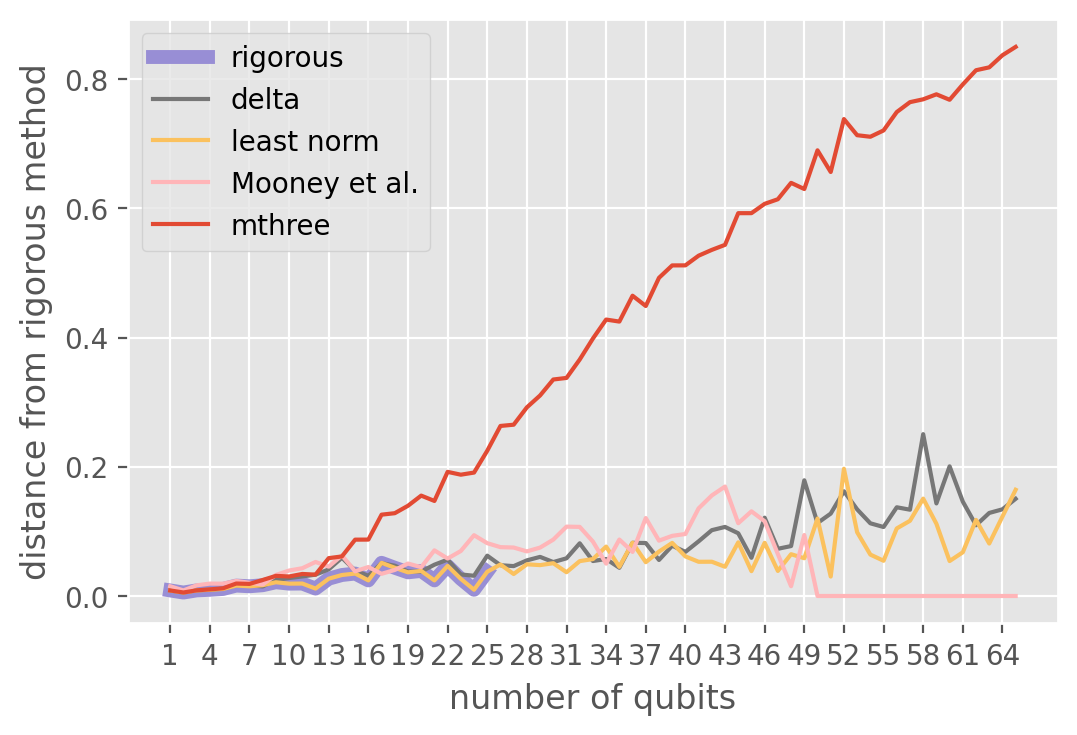

In [16]:
# plt.plot(range(1,21), ignis_dists, label="ignis", color="C2")
plt.figure(dpi=200)
plt.plot(range(min_size, 25 + 1), ignis_dists / (1 << 10), label="rigorous", color="C2", lw=5)
plt.plot(range(min_size, max_size + 1), delta_dists / (1 << 10), label="delta", color="C3")
plt.plot(range(min_size, max_size + 1), lnp_dists / (1 << 10), label="least norm", color="C4")
plt.plot(range(min_size, max_size + 1), mooney001_dists / (1 << 10), label="Mooney et al.", color="C6")
plt.plot(range(min_size, max_size + 1), mthree_lu_dists / (1 << 10), label="mthree", color="C0")
plt.legend()
plt.xticks(range(min_size, max_size + 1, 3))
plt.xlabel("number of qubits")
plt.ylabel("distance from rigorous method")

Text(0, 0.5, 'distance from rigorous method')

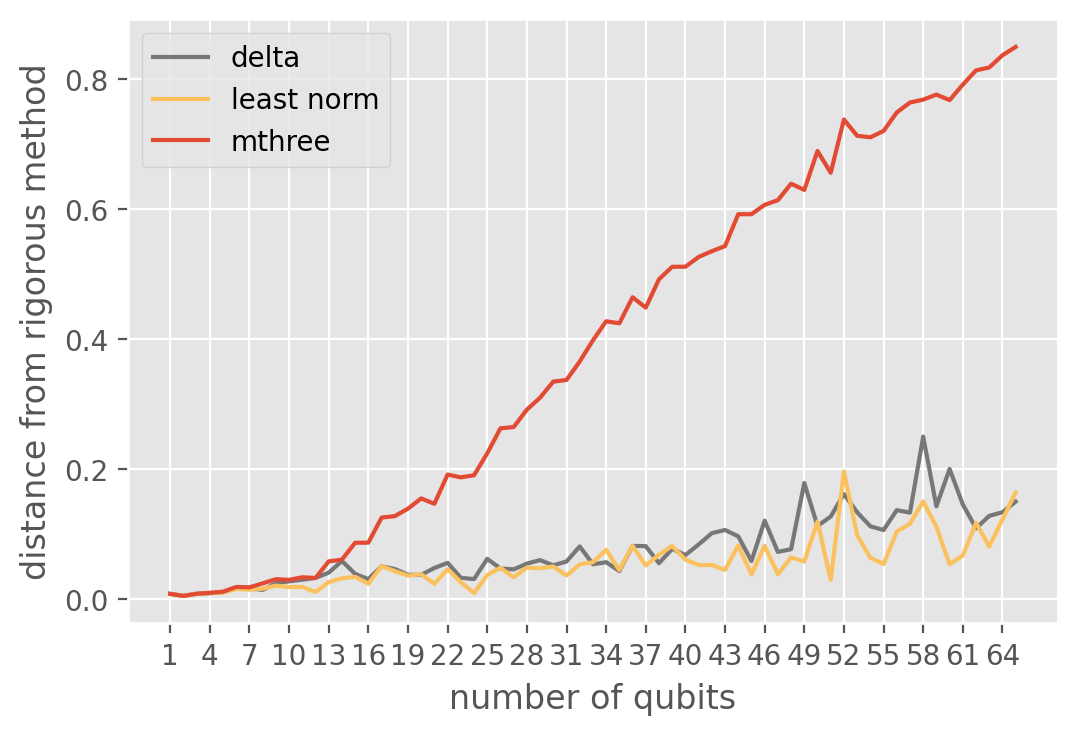

In [16]:
# plt.plot(range(1,21), ignis_dists, label="ignis", color="C2")
plt.figure(dpi=200)
# plt.plot(range(min_size, 25 + 1), ignis_dists / 1 << 10, label="rigorous", color="C2", lw=10)
plt.plot(range(min_size, max_size + 1), delta_dists / (1 << 10), label="delta", color="C3")
plt.plot(range(min_size, max_size + 1), lnp_dists / (1 << 10), label="least norm", color="C4")
# plt.plot(range(min_size, max_size + 1), mooney001_dists / (1 << 10), label="Mooney et al.", color="C6")
plt.plot(range(min_size, max_size + 1), mthree_lu_dists / (1 << 10), label="mthree", color="C0")
plt.legend()
plt.xticks(range(min_size, max_size + 1, 3))
plt.xlabel("number of qubits")
plt.ylabel("distance from rigorous method")

Text(0, 0.5, 'distance from all zero state')

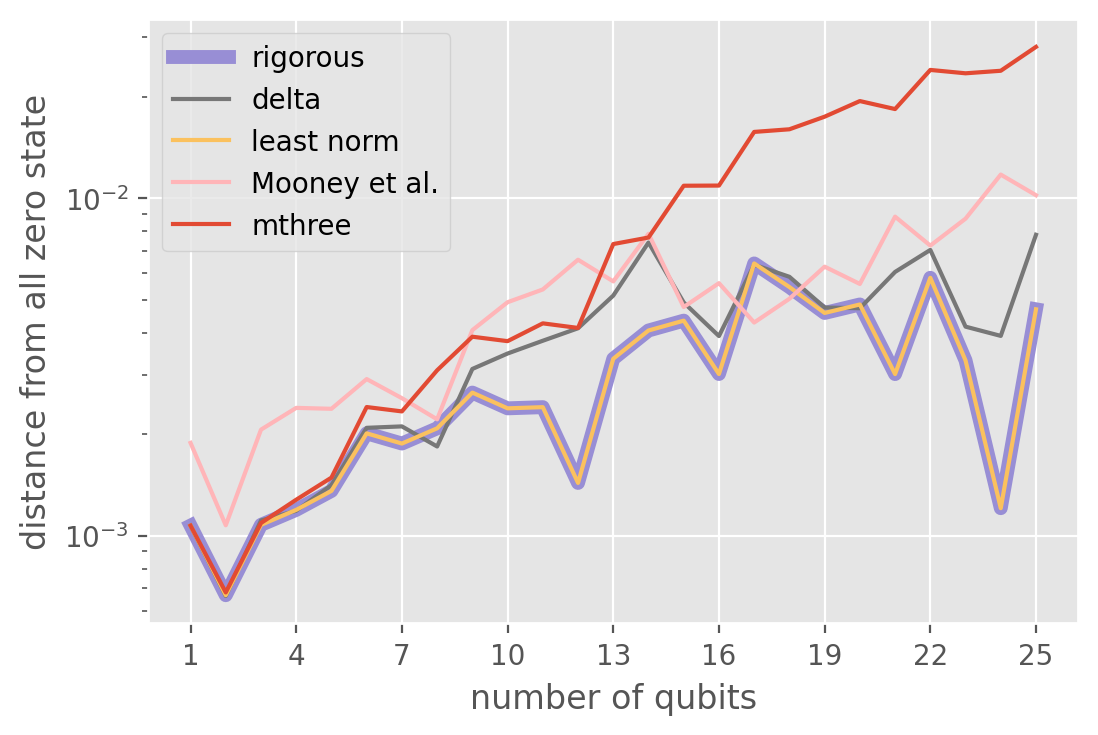

In [17]:
plt.figure(dpi=200)
plt.plot(range(min_size, 25 + 1), ignis_dists / 8192, label="rigorous", color="C2", lw=5)
plt.plot(range(min_size, 25 + 1), delta_dists[:25] / 8192, label="delta", color="C3")
plt.plot(range(min_size, 25 + 1), lnp_dists[:25] / 8192, label="least norm", color="C4")
plt.plot(range(min_size, 25 + 1), mooney001_dists[:25] / 8192, label="Mooney et al.", color="C6")
plt.plot(range(min_size, 25 + 1), mthree_lu_dists[:25] / 8192, label="mthree", color="C0")
plt.legend()
plt.xticks(range(min_size, 25 + 1, 3))
plt.yscale("log")
plt.xlabel("number of qubits")
plt.ylabel("distance from all zero state")